In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  
%matplotlib inline

In [3]:
#Read the data and parse in correct format
#Read in project file
filename = 'beeradvocate.txt'
data = pd.read_csv(filename, quoting=3, delimiter='\r', header=None, skip_blank_lines=True, engine='c')
#Parse file and create a dataframe
import re

def parse_my_file(filename):
   with open(filename, encoding='utf8') as f:
       for l in f:
           line = l.rstrip()
           if line:
               yield re.split(': ', line.strip(),1)
   f.close()
my_parser = parse_my_file(filename)
columns = ['category', 'value']
df = pd.DataFrame(my_parser, columns=columns)

In [4]:
nums = range(0,1586614)
index = []
for num in nums:
    index.extend([num for i in range(13)])
df['index'] = index
reviews = df.pivot(columns='category', values='value', index='index')
reviews[[col for col in reviews.columns if ':' in col]]
reviews.drop(['beer/ABV:', 'review/profileName:', 'review/text:'], axis = 1, inplace=True)

In [4]:
reviews.head()

category,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/profileName,review/taste,review/text,review/time
index,,,,,,,,,,,,,
0,5.00,47986,10325,Sausa Weizen,Hefeweizen,2.5,2,1.5,1.5,stcules,1.5,A lot of foam. But a lot.\tIn the smell some b...,1234817823
1,6.20,48213,10325,Red Moon,English Strong Ale,3,2.5,3,3,stcules,3,"Dark red color, light beige foam, average.\tIn...",1235915097
2,6.50,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3,2.5,3,3,stcules,3,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.00,47969,10325,Sausa Pils,German Pilsener,3.5,3,3,2.5,stcules,3,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.70,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4,4.5,4,4,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [152]:
# Data conversion
reviews['review/str'] = reviews['review/text'].astype('str')
reviews['review/len'] = reviews['review/str'].map(len)
reviews.head()

category,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/profileName,review/taste,review/text,review/time,review/str,review/len,review/roundrating
index,,,,,,,,,,,,,,,,
0,5.00,47986,10325,Sausa Weizen,Hefeweizen,2.5,2,1.5,1.5,stcules,1.5,A lot of foam. But a lot.\tIn the smell some b...,1234817823,A lot of foam. But a lot.\tIn the smell some b...,262,2.0
1,6.20,48213,10325,Red Moon,English Strong Ale,3,2.5,3.0,3,stcules,3,"Dark red color, light beige foam, average.\tIn...",1235915097,"Dark red color, light beige foam, average.\tIn...",338,3.0
2,6.50,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3,2.5,3.0,3,stcules,3,"Almost totally black. Beige foam, quite compac...",1235916604,"Almost totally black. Beige foam, quite compac...",396,3.0
3,5.00,47969,10325,Sausa Pils,German Pilsener,3.5,3,3.0,2.5,stcules,3,"Golden yellow color. White, compact foam, quit...",1234725145,"Golden yellow color. White, compact foam, quit...",401,3.0
4,7.70,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4,4.5,4.0,4,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,"According to the website, the style for the Ca...",1145,4.0


In [153]:
reviews['review/overall'] = pd.to_numeric(reviews['review/overall'])
reviews['review/roundrating'] = np.round(reviews['review/overall'])

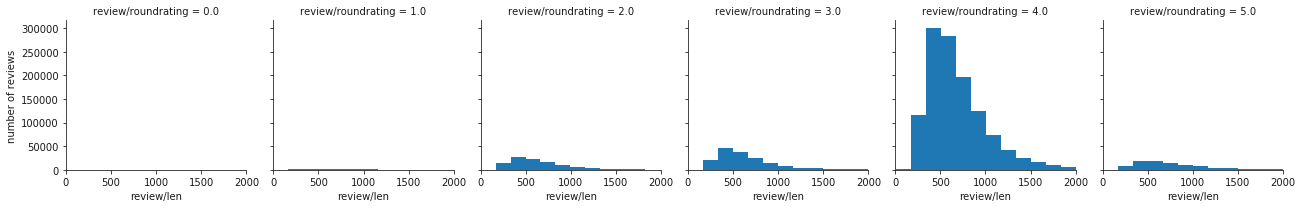

In [154]:
#Plot showing that the data is biased with most of the reviews being positive with rating 4. Also reviews are 500 to 1000 words long.
ax = sns.FacetGrid(data=reviews, col='review/roundrating', xlim=(0, 2000)).map(plt.hist, 'review/len', bins=30)
ax.axes[0][0].set(ylabel='number of reviews');

Reviews text processing.  
Divide reviews in positive and negative reviews

In [52]:
# Reviews text processing.
# Divide reviews in positive and negative reviews
pos_reviews = reviews['review/str'][reviews['review/overall']>4].values
neg_reviews = reviews['review/str'][reviews['review/overall']<2].values
print('Postive Reviews:  {:,}'.format(len(pos_reviews)))
print('Negative Reviews:  {:,}'.format(len(neg_reviews)))

Postive Reviews:  415,705
Negative Reviews:  23,936


In [54]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = stopwords.words('english')
tfidf_pos = TfidfVectorizer(stop_words=stopwords, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')
tfidf_neg = TfidfVectorizer(stop_words=stopwords, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

In [55]:
np.random.seed(38)
num_reviews = 20000
random_neg = np.random.choice(neg_reviews, size=num_reviews)
random_pos = np.random.choice(pos_reviews, size=num_reviews)

In [56]:
neg_vectors = tfidf_neg.fit_transform(neg_reviews)
pos_vectors = tfidf_pos.fit_transform(pos_reviews)
#neg_df = pd.DataFrame(neg_vectors.todense(), columns=[tfidf_neg.get_feature_names()])
#pos_df = pd.DataFrame(pos_vectors.todense(), columns=[tfidf_pos.get_feature_names()])
#col_means_neg = {}
#for col in neg_df:
#    col_means_neg[col] = neg_df[col].mean()
#col_means_pos = {}
#for col in pos_df:
#    col_means_pos[col] = pos_df[col].mean()

In [14]:
#num_top_words = 8
#print('Top %d words in POSITIVE reviews:' %num_top_words, end='')
#print(sorted(col_means_pos, key=col_means_pos.get, reverse=True)[:num_top_words])
#print('Top %d words in NEGATIVE reviews:' %num_top_words, end='')
#print(sorted(col_means_neg, key=col_means_neg.get, reverse=True)[:num_top_words])

Top 8 words in POSITIVE reviews:

NameError: name 'col_means_pos' is not defined

In [157]:
neg_vectors

<23936x7617 sparse matrix of type '<class 'numpy.float64'>'
	with 1235557 stored elements in Compressed Sparse Row format>

In [57]:
# Non negative matrix factorization
from sklearn.decomposition import NMF
num_topics = 6
nmf_pos = NMF(n_components=num_topics)
W_pos = nmf_pos.fit_transform(pos_vectors)
H_pos = nmf_pos.components_
nmf_neg = NMF(n_components=num_topics)
W_neg = nmf_neg.fit_transform(neg_vectors)
H_neg = nmf_neg.components_

In [58]:
# Top topics for positive and negative reviews
def display_topics(model, feature_names, num_topics, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx < num_topics:
            print("{:11}".format("Topic %d:" %(topic_idx)), end='')
            print(", ".join(['{:04.3f}*'.format(topic[i])+feature_names[i] \
                             for i in topic.argsort()[:-no_top_words-1:-1]]))
no_topics = num_topics
no_top_words = 6
print('Top topics + words for POSITIVE reviews')
print('-'*39)
display_topics(nmf_pos, tfidf_pos.get_feature_names(), no_topics, no_top_words)
print('\nTop topics + words for NEGATIVE reviews')
print('-'*39)
display_topics(nmf_neg, tfidf_neg.get_feature_names(), no_topics, no_top_words)

Top topics + words for POSITIVE reviews
---------------------------------------
Topic 0:   3.777*hops, 2.788*hop, 2.376*citrus, 2.313*malt, 2.070*ipa, 1.877*pine
Topic 1:   3.803*coffee, 3.748*chocolate, 2.431*roasted, 1.957*black, 1.716*dark, 1.640*stout
Topic 2:   2.121*dark, 1.782*brown, 1.565*alcohol, 1.530*caramel, 1.499*sweet, 1.146*bourbon
Topic 3:   2.222*one, 2.168*like, 1.387*really, 1.293*would, 1.244*smell, 1.160*much
Topic 4:   2.584*light, 1.621*yeast, 1.614*wheat, 1.424*white, 1.350*lemon, 1.265*banana
Topic 5:   5.478*nice, 1.602*good, 0.878*malty, 0.862*color, 0.802*great, 0.773*really

Top topics + words for NEGATIVE reviews
---------------------------------------
Topic 0:   1.188*hops, 1.030*malt, 0.842*flavor, 0.842*aroma, 0.796*hop, 0.736*bitter
Topic 1:   1.371*light, 1.066*corn, 0.953*water, 0.904*yellow, 0.714*watery, 0.667*pale
Topic 2:   0.901*one, 0.731*bad, 0.646*would, 0.585*drink, 0.580*really, 0.566*good
Topic 3:   2.096*sweet, 1.718*alcohol, 0.461*sugar,

In [30]:
review_num = np.random.randint(0, high=len(random_pos))
print(review_num)
print(random_pos[review_num])

6761
Had a pitcher of this on tap with some friends tonight. It was a copper color, with a small head. Taste is pretty good, it is a bit sweet as other reviews have mentioned, but I don't find that a bad thing in this brew. The hops were predominant as would be expected, and there was a nice malt backbone. I thought this was a nicely balanced and very drinkable pale ale. I would definitely drink this again, and I would recommend trying it.


In [43]:
#random positive review
review_num = np.random.randint(0, high=len(random_pos))
print('Positive Review #%d' %review_num)
print('-'*25)
print(random_pos[review_num])
print('-'*25)
topic_dict = {}
for ind, w in enumerate(W_pos[review_num]):
    topic_dict[ind] = w
for k in sorted(topic_dict, key=topic_dict.get, reverse=True):
     print('Topic {}: {:.4f}'.format(k, topic_dict[k]))

Positive Review #3743
-------------------------
A - Lovely crystal red with lots of caramel color. Very little white head remains with no lacing. But, a large voluptuous head pours liquid white. 		S - Lots of grape, yes grape. Deep bourbon hidden within. Amazingly bourbon when you get below the surface layer. Smells like champagne yeast was used... no Belgain?		T - Slight bourbon flavor with deep bourbon burn. Very smooth and delicious. Exactly as style should be. 		M - Slight over carbonation. Dry. Some heat. 		O - A nice brew. A bit strong, but nothing one man couldn't handle ;) Recommended.
-------------------------
Topic 1: 0.0361
Topic 2: 0.0045
Topic 0: 0.0035
Topic 3: 0.0033
Topic 5: 0.0020
Topic 4: 0.0016


In [51]:
#random negative review
review_num = np.random.randint(0, high=len(random_neg))
print('Negative Review #%d' %review_num)
print('-'*25)
print(random_neg[review_num])
print('-'*25)
topic_dict = {}
for ind, w in enumerate(W_neg[review_num]):
    topic_dict[ind] = w
for k in sorted(topic_dict, key=topic_dict.get, reverse=True):
     print('Topic {}: {:.4f}'.format(k, topic_dict[k]))

Negative Review #32636
-------------------------
This beer's score is rather shocking to me.		Pours a dull red. Inch or two of white foam. Smells like ... what is that? Kind of a herbally, hoppy scent, maybe some yeast ... pretty weird.		Taste is just all over the place. A weird astringent minty/herbaliness, maybe some piney/earthy hops (just a bit), and a strange overly sweet caramel malt base. Just bizarre tasting. 		Will avoid in the future.
-------------------------
Topic 1: 0.0409
Topic 0: 0.0102
Topic 5: 0.0091
Topic 2: 0.0020
Topic 3: 0.0015
Topic 4: 0.0000


In [37]:
no_topics = num_topics
no_top_words = 6

print('Topics for POSITIVE reviews')
print('-'*39)
display_topics(nmf_pos, tfidf_pos.get_feature_names(), no_topics, no_top_words)

print('\nTopics for NEGATIVE reviews')
print('-'*39)
display_topics(nmf_neg, tfidf_neg.get_feature_names(), no_topics, no_top_words)

Topics for POSITIVE reviews
---------------------------------------
Topic 0:   4.721*hops, 3.362*hop, 2.985*malt, 2.930*citrus, 2.546*ipa, 2.249*pine
Topic 1:   4.647*coffee, 4.631*chocolate, 3.180*roasted, 2.471*black, 2.258*dark, 2.005*stout
Topic 2:   2.573*dark, 2.368*brown, 2.216*sweet, 2.206*caramel, 2.067*alcohol, 1.338*fruit
Topic 3:   2.888*like, 2.633*one, 1.840*really, 1.725*would, 1.649*smell, 1.630*much
Topic 4:   3.665*light, 2.155*wheat, 2.064*yeast, 1.849*white, 1.637*lemon, 1.540*banana
Topic 5:   6.907*nice, 1.740*good, 1.121*malty, 0.955*color, 0.853*smell, 0.702*really

Topics for NEGATIVE reviews
---------------------------------------
Topic 0:   1.994*hops, 1.546*malt, 1.365*hop, 1.072*bitter, 1.029*bitterness, 0.888*medium
Topic 1:   2.008*light, 1.394*corn, 1.132*yellow, 0.951*watery, 0.935*pale, 0.750*water
Topic 2:   1.061*one, 0.896*bad, 0.778*would, 0.775*good, 0.769*really, 0.718*drink
Topic 3:   1.774*coffee, 1.734*chocolate, 1.513*dark, 1.131*black, 1.088

In [59]:
reviews.head()

category,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/profileName,review/taste,review/text,review/time,review/str,review/len,review/roundrating
index,,,,,,,,,,,,,,,,
0,5.00,47986,10325,Sausa Weizen,Hefeweizen,2.5,2,1.5,1.5,stcules,1.5,A lot of foam. But a lot.\tIn the smell some b...,1234817823,A lot of foam. But a lot.\tIn the smell some b...,262,2.0
1,6.20,48213,10325,Red Moon,English Strong Ale,3,2.5,3.0,3,stcules,3,"Dark red color, light beige foam, average.\tIn...",1235915097,"Dark red color, light beige foam, average.\tIn...",338,3.0
2,6.50,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3,2.5,3.0,3,stcules,3,"Almost totally black. Beige foam, quite compac...",1235916604,"Almost totally black. Beige foam, quite compac...",396,3.0
3,5.00,47969,10325,Sausa Pils,German Pilsener,3.5,3,3.0,2.5,stcules,3,"Golden yellow color. White, compact foam, quit...",1234725145,"Golden yellow color. White, compact foam, quit...",401,3.0
4,7.70,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4,4.5,4.0,4,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,"According to the website, the style for the Ca...",1145,4.0


In [65]:
df_pos = reviews[['beer/beerId', 'beer/style', 'review/overall', 'review/text', 'review/len']][reviews['review/overall']>3.5].reset_index()
df_neg = reviews[['beer/beerId', 'beer/style', 'review/overall', 'review/text', 'review/len']][reviews['review/overall']<2.5].reset_index()
df_pos.drop(labels='index', axis=1, inplace=True)
df_neg.drop(labels='index', axis=1, inplace=True)

In [66]:
from sklearn.preprocessing import normalize
print('Normalized Topic weights : ', normalize(W_pos[0].reshape(1,-1), norm='l1'))
print('Sum of normalized weights: ', normalize(W_pos[0].reshape(1,-1), norm='l1').sum())

Normalized Topic weights :  [[0.21973733 0.05360465 0.0173341  0.27241759 0.36048849 0.07641785]]
Sum of normalized weights:  1.0000000000000002


In [67]:
# add normalized topic weights to each review
df_pos = pd.concat([df_pos, pd.DataFrame(normalize(W_pos, norm='l1'))], axis=1)
df_neg = pd.concat([df_neg, pd.DataFrame(normalize(W_neg, norm='l1'))], axis=1)

In [68]:
df_neg.head()

,beer/beerId,beer/style,review/overall,review/text,review/len,0,1,2,3,4,5
0,47986,Hefeweizen,1.5,A lot of foam. But a lot.\tIn the smell some b...,262,0.237704,0.000000,0.000000,0.085523,0.166525,0.510249
1,10789,Oatmeal Stout,2.0,Caldera presents yet another circumstance wher...,1667,0.015249,0.465715,0.490197,0.000000,0.002961,0.025877
2,58920,Belgian Strong Dark Ale,2.0,22 oz bomber to pint glass\t\tPours a rich red...,1506,0.548896,0.000000,0.326962,0.095445,0.000000,0.028697
3,20817,American Adjunct Lager,2.0,Poured a very pale yellow. No head whatsoever....,431,0.345571,0.000000,0.652248,0.000000,0.002181,0.000000
4,20817,American Adjunct Lager,1.0,Let me start by sharing what's on the side of ...,622,0.741358,0.012084,0.006191,0.240367,0.000000,0.000000


In [70]:
df_pos_bsns = df_pos.groupby('beer/style').agg({'review/overall':'mean', 'review/text':'count',
                                                 'review/len':'mean',0:'mean', 
                                                 1:'mean', 2:'mean', 3:'mean',
                                                 4:'mean', 5:'mean'}).reset_index()
df_neg_bsns = df_neg.groupby('beer/style').agg({'review/overall':'mean', 'review/text':'count',
                                                 'review/len':'mean',0:'mean', 
                                                 1:'mean', 2:'mean', 3:'mean',
                                                 4:'mean', 5:'mean'}).reset_index()

In [81]:
df_pos_bsns.sort_values(by = 'review/overall', inplace = True, ascending = False)
df_neg_bsns.sort_values(by = 'review/overall', inplace = True, ascending = True)

In [127]:
df_pos_tot = df_pos_bsns.agg({'review/overall':'mean', 'review/text':'count',
                                                 'review/len':'mean',0:'mean', 
                                                 1:'mean', 2:'mean', 3:'mean',
                                                 4:'mean', 5:'mean'})
df_neg_tot = df_neg_bsns.agg({'review/overall':'mean', 'review/text':'count',
                                                 'review/len':'mean',0:'mean', 
                                                 1:'mean', 2:'mean', 3:'mean',
                                                 4:'mean', 5:'mean'})

In [143]:
df_pos_bsns.reset_index(inplace=True)
df_neg_bsns.reset_index(inplace=True)

In [133]:
df_pos_tot.shape

(9,)

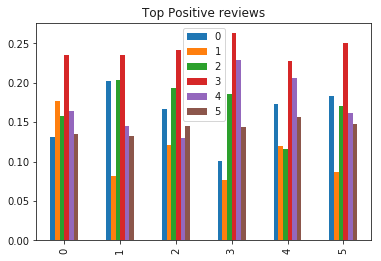

In [159]:
df_pos_bsns[[0,1,2,3,4,5]].head(6).plot(kind='bar', title = 'Top Positive reviews')

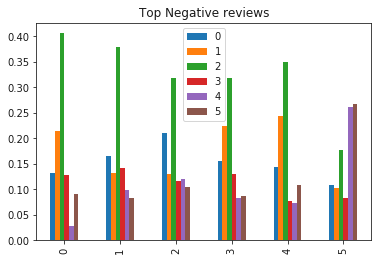

In [160]:
df_neg_bsns[[0,1,2,3,4,5]].head(6).plot(kind='bar', title = 'Top Negative reviews')